In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [237]:
X = breast_cancer.data
Y = breast_cancer.target
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [238]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

Reading it as a dataframe

In [0]:
data=pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [0]:
data['class']= breast_cancer.target

In [242]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [243]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Number of instances of 1s and 0s

In [244]:
print(data["class"].value_counts())

1    357
0    212
Name: class, dtype: int64


In [245]:
print (breast_cancer.target_names)

['malignant' 'benign']


We use group by the class value and calc the mean of 357 is in one block

In [246]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [248]:
X = data.drop('class',axis=1)
Y = data['class']
type(X)

pandas.core.frame.DataFrame

In [249]:

X_train,X_test,Y_train,Y_test= train_test_split(X,Y)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)
                                                

(569, 30) (426, 30) (143, 30)
(569,) (426,) (143,)


In [250]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1)
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.630859375 0.5964912280701754


We have to make values uniform so that test data set matches the train dataset

In [0]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,stratify=Y)


In [252]:
print(X_train.mean(),X_test.mean(),X.mean())

mean radius                 14.106324
mean texture                19.285488
mean perimeter              91.840879
mean area                  653.270898
mean smoothness              0.096314
mean compactness             0.104434
mean concavity               0.089546
mean concave points          0.048911
mean symmetry                0.181502
mean fractal dimension       0.062807
radius error                 0.408488
texture error                1.230894
perimeter error              2.889765
area error                  40.641508
smoothness error             0.007065
compactness error            0.025929
concavity error              0.032664
concave points error         0.011915
symmetry error               0.020710
fractal dimension error      0.003840
worst radius                16.233592
worst texture               25.692344
worst perimeter            107.000742
worst area                 876.492578
worst smoothness             0.132025
worst compactness            0.253861
worst concav

In [0]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [254]:
print(X_train.mean(),X_test.mean(),X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

#Binarisation of I/P

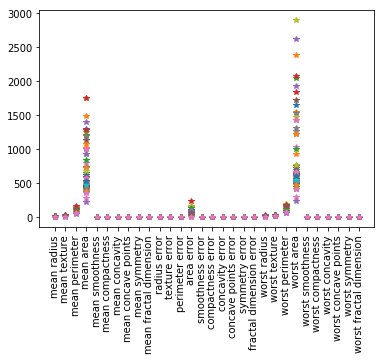

In [269]:
import matplotlib.pyplot as plt
plt.plot(X_test.T,'*') #Transpose is plotted
plt.xticks(rotation='vertical') #Labels are rotated vertically
plt.show()

Binarise the data above a threshold (y axis)

In [0]:
X_binarised_3_train=X_train['mean area'].map(lambda x:0 if x<1000 else 1) 
#0,1,2,3 4th col num 3 is selected

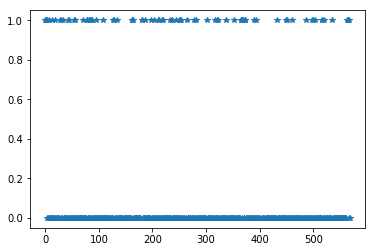

In [257]:
plt.plot(X_binarised_3_train,'*')

Using Pandas feature cut

In [0]:
X_binarised_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

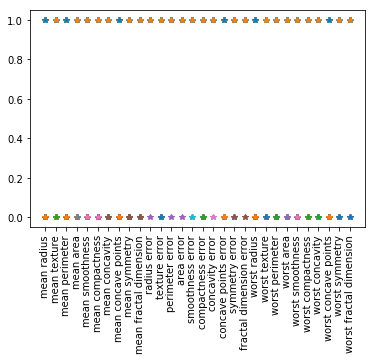

In [259]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [271]:
type(X_binarised_test)
print(X_binarised_test.head())

    mean radius mean texture  ... worst symmetry worst fractal dimension
145           1            1  ...              1                       0
272           0            0  ...              0                       0
480           1            1  ...              1                       1
463           1            1  ...              0                       1
256           0            0  ...              0                       0

[5 rows x 30 columns]


Converting data frame into numpy arrays

In [262]:
type(X_binarised_test)

pandas.core.frame.DataFrame

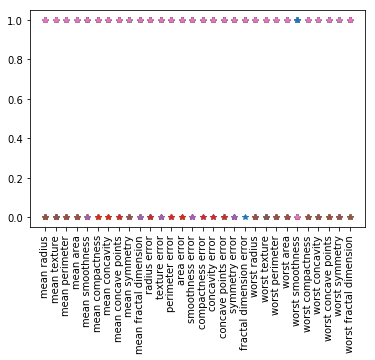

pandas.core.frame.DataFrame

In [263]:
X_binarised_test=X_test.apply(pd.cut,bins=2,labels=[1,0] )
plt.plot(X_binarised_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()
type(X_binarised_train)

# Inference and Search(MP MODEL)

In [0]:
from random import randint

In [268]:
b = 3

i= randint(0, X_binarised_train.shape[0])
print('For row', i )  #Here we select random row values signified by X
#It is important to obsv y reperesents the cat i.e col while X represents
#The rows of data
# returns tuple of first entry viz row number
if(np.sum(X_binarised_train[100,:])>=b): #100th row or column
  print('MP neuron infers malignant')
else:
  print('MP neuron infers benign')
  
if(Y_train[i] == 1):
  print('Ground truth is Malignant')
else:
  print('Ground truth is Benign')

For row 110


TypeError: ignored

In the above code cell we need to optimize b value such that the predicted and correct output are same i.e increasing the accuracy

In [0]:
b=3
#pre processing
y_pred_train=[]
accurate_rows=0
for x,y in zip(X_binarised_train,Y_train): #accuracy comparison can be done here
  y_pred= (np.sum(x) >= b)             
  y_pred_train = (np.sum(x)>=b)#x is the set of 30 numbers
  accurate_rows+=(y==y_pred)
  
print(accurate_rows,accurate_rows/X_binarised_train.shape[0])  

In [0]:
for b in range(X_binarised_train.shape[1] + 1):
 #pre processing
  y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarised_train,Y_train): #accuracy comparison can be done here
    y_pred= (np.sum(x) >= b)             
    y_pred_train = (np.sum(x)>=b)#x is the set of 30 numbers
    accurate_rows+=(y==y_pred)
  print(b, accurate_rows/X_binarised_train.shape[0])  

#Inference on Test data set

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
b=28
#pre processing
Y_pred_test=[]

#accurate_rows=0
for x in X_binarised_test: #accuracy comparison can be done here
  y_pred= (np.sum(x) >= b)             
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test,Y_test)

print(b,accuracy)  

#MP Neuron Class

In [0]:
class MPNeuron:
  
  def __init__(self):
    self.b = None  #defining the b parameter
    
  def model(self, x): 
    return(sum(x) >= self.b) #returns output relative to threshold
  
  
  def predict(self, X):#Taking  X viz sequence of rows to be inferred on and 
    #returning it as Y
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y): #Learning algo to find b
    accuracy = {} #accuracy defined as a dictionary
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)#Y is the ground truth
      
    best_b = max(accuracy, key = accuracy.get) #second para to get best b
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [0]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Now on Test data set

In [0]:
Y_test_pred=mp_neuron.predict(X_binarised_test)
accuracy_test =accuracy_score(Y_test_pred,Y_test)

#Perceptron Class

In [0]:
print(accuracy_test)

In [0]:
X_train = X_train.values
X_test= X_test.values
print('X_train',X_train)
print('X_test',X_test)

* *italicized* text*$y = 1, \mbox{if} \sum_i w_i x_i >= b$
  
                 $y =  0, \mbox{otherwise}$

In [0]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [0]:
perceptron = Perceptron()

In [0]:
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.5)

In [0]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [0]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

In [0]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [0]:
HTML(anim.to_html5_video())